<center><h2><b>13.The Lagrange point</b></h2></center>
<center><h4>Exercise 6.16 from Computational Physics by Mark Newman</h4></center>
<center><h4>Code Author: Pratiksha Balasaheb Gaikwad</h4></center>
<hr style="height:2px;border-width:0;color:orange;background-color:orange">
<hr style="height:2px;border-width:0;color:blue;background-color:blue">


In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString

**Exercise 6.16: The Lagrange point**  
There is a magical point between the Earth and the Moon, called the L1 Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two. This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit. Here's the setup:

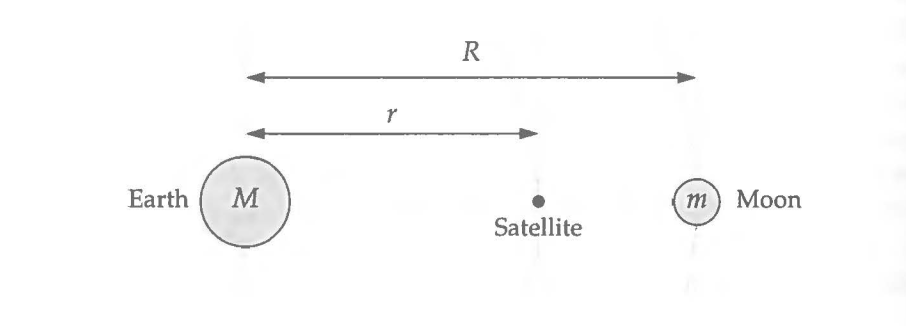

In [2]:
Image(filename='Lagrange_point_diagram.png', width=800)

**a) Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, show that the distance r from the center of the Earth to the L1 point satisfies**

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = w^2r$$


where 

$$\begin{split}
R & \quad \text{the distance from the Earth to the Moon}\\
M,m & \quad \text{the masses of Earth and Moon, respectively,}\\
G & \quad  \text{Newton's gravitational constant},\\ 
w & \quad \text{the angular velocity of both the Moon and the satellite.}
\end{split}$$


<center><b>ANSWER</center></b>

$$\frac{GMm}{R^2} = \frac{mv^2}{R}$$

Multiplying both sides by $r/m$

$$\frac{GM}{R} = v^2$$

If $T$ is the orbital period of moon, since the distance covered by the satellite each orbit is $2\pi R$,

$$vT = 2\pi R$$

Dividing above expression by $T$ on both sides:
$$v = \frac{2\pi R}{T}.$$



Taking square on both sides:
$$v^2 = \frac{4\pi^2 R^2}{T^2}.$$



Therefore,
$$\frac{GM}{R} = \frac{4\pi^2 R^2}{T^2}$$

Dividing both sides by $R^2$:
$$\frac{GM}{R^3} = \frac{4\pi^2}{T^2},$$

from which Kepler's $3^{rd}$ law for circular orbits follows.

As shown in the given drawing,a satellite of mass $m_s$ is located on the line connecting the Earth and the Moon, at a distance $r$ from the Earth and $(R-r)$ from the Moon. The force $F$ pulling it towards the Earth is decreased by the pull of the Moon in the opposite direction, so

$$F = \frac{GMm_s}{r^2} - \frac{Gmm_s}{(R-r)^2} = \frac{m_sv_s^2}{r}.$$

In a similar way as above calculations,  multiplying the equation on both sides by $r/m_s$, giving

$$\frac{GM}{r} - \frac{Gmr}{(R-r)^2} = v_s^2.$$


As given, we can assume that the satellite also has circular orbit around the Earth, of radius $r$. (That of course requires the Moon to be always in place to pull in the opposite direction from the Earth, a subject to which we will return shortly). The orbital period $T_s$ of the satellite then satisfies,

$$v_sT_s = 2\pi r$$

from which, $$v_s^2 = \frac{4\pi^2r^2}{T_s^2}.$$

Therefore we have,

$$\frac{GM}{r} - \frac{Gmr}{(R-r)^2} = \frac{4\pi^2r^2}{T_s^2},$$

dividing both sides by $r$ will give,

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \frac{4\pi^2r}{T_s^2},$$

which is similar to the earlier Kepler's $3^{rd}$ law eauation, except that the Moon's opposing pull is now added. 


But will the Moon be always located where its pull on the satellite is exactly opposite to the Moon? _No, unless the two orbital periods are the same,_

$$T_s = T.$$

Thus, substituting $w$ for $2\pi/Ts = 2\pi/T$, the angular velocity of the moon and the satellite, will give,

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = w^2r.$$


Only then does the satellite's motion match that of the Moon and the distance between the two stays constant. That in general only happens at one value of r, that is, only at one distance from the Moon, and that distance r is now the unknown number we need to derive, the "thing" that we seek. With $T_s  = T$, one may substitute Kepler's $3^{rd}$ law for Moon alone, derived earlier:

$$\frac{GM}{R^3} = \frac{4\pi^2}{T^2}$$

$$\frac{GM}{r^3} -\frac{Gm}{r(R-r)^2} = \frac{GM}{R^3} $$


**b)** The equation above is a degree-five polynomial equation in $r$ (also called a quintic equation). Such equations cannot be solved exactly in closed form, but it's straightforward to solve them numerically. Write a program that uses either Newton's method or the secant method to solve for the distance r from the Earth to the L1 point. Compute a solution accurate to at least four significant figures. The values of the various parameters are:

$$\begin{split}
G &= 6.674 x 10^{-11}m^3kg^{-1}s^{-2},\\
M &= 5.974 x 10^{24} kg, \\
m &= 7.348 x 10^{22} kg,\\
R &= 3.844 x 10^8 m, \\
w &= 2.662x10^{-6} s^{-1}.
\end{split}$$

You will also need to choose a suitable starting value for r, or two starting values if you use the secant method.

In [3]:
G = 6.674e-11 #m^3kg^{-1}s^{-2}
M = 5.974e24 #kg
m = 7.348e22 #kg
R = 3.844e8 #m
w = 2.662e-6 #s^{-1}

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = w^2r.$$

Quintic equation:

$$ w^2r^5 - 2w^2Rr^4 + w^2R^2r^3 + G(m-M)r^2 + 2RGMr-GMR^2=0 $$

In [4]:
def f(r):
    val = w**2*r**5 - 2*w**2*R*r**4 + w**2*R**2*r**3 + G*(m-M)*r**2 + 2*R*G*M*r - G*M*R**2
    return val

In [5]:
def df(r):
    dval = 5*w**2*r**4 - 8*w**2*R*r**3 + 3*w**2*R**2*r**2 + 2*G*(m-M)*r + 2*R*G*M 
    return dval

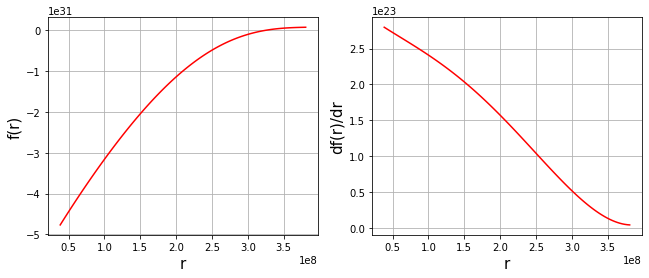

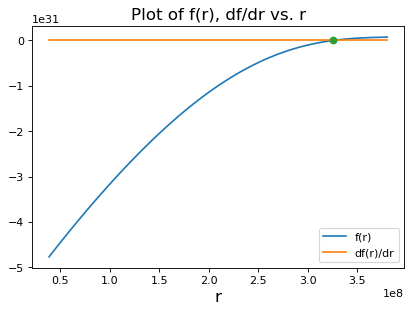


f(r) = df(r)/dr at (r,f(r)) = (3.26e+08,2.87e+22).



In [6]:
# Let's plot the quintic polynomial

r = np.linspace(0.1*R, 0.99*R, 100)

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.subplots_adjust(left=None, bottom=None, right=1.5, top=None, wspace=None, hspace=None)

plt.subplot(121)
# plt.tight_layout()
plt.plot(r, f(r), '-r')
plt.xlabel("r", fontsize=15), plt.ylabel("f(r)", fontsize=15)
plt.grid()

plt.subplot(122)
#plt.tight_layout()
plt.plot(r, df(r), '-r')
plt.xlabel("r", fontsize=15), plt.ylabel("df(r)/dr", fontsize=15)
plt.grid()

# Combined plot
fig2 = plt.figure(dpi = 80)
plt.plot(r, f(r), label='f(r)')
plt.plot(r, df(r), label='df(r)/dr')
plt.xlabel('r', fontsize=15)
plt.legend(loc='best', fontsize=10)
plt.title( fontsize=15, label="Plot of f(r), df/dr vs. r")


# Find out the intersection point of the two lines in the plot
first_line = LineString(np.column_stack((r, f(r))))
second_line = LineString(np.column_stack((r, df(r))))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
x, y = intersection.xy
plt.show()

print(f"\nf(r) = df(r)/dr at (r,f(r)) = ({x[0]:.2e},{y[0]:.2e}).\n")



In [7]:
def NR_method(f, df, x0, tol=1.0e-4, max_iter=100):
    """                                                                                                           
    Function for Newton-Raphson method to find root of an equation.                                                        
                                                                                                                  
    Inputs: 
            f: pre-defined function 
           df: analytic derivative of f                                           
           x0: guess for the root                                                                           
          tol: error tolerance 
     max_iter: upper bound for iterations 
     
    Returns: root if converged, else nan                                                                          
    """
    iter=0
    error = 10*tol
    
    print("r \t    |\t error=(r-r0)| \t\tf(r)")
    print("--------------------------------------------------------------")
    while iter < max_iter:

        # main calculation for N-R algorithm
        x = x0 - f(x0)/df(x0)
        #print(f(x0), df(x0))

        # Return the solution if tolerance is reached
        if error < tol:
            print("Calculation converged to root x=%g in %d iterations."%(x,iter))
            return x
        
        error = np.abs(x - x0)    
        print(f'{x:.5e} |\t {np.abs(error):.5e} |\t {f(x):.5e}\n')
        
        x0 = x
        iter += 1
        
    print("Did not converge to root within {} iterations."
          .format(max_iter))
    return np.nan


In [8]:
print("\nRoot finding using N-R method to find solution to the quintic polynomial, f(r):\n\n")
x0 = 1e7 # Deciding initial guess as per the intersection point obtained above
root=NR_method(f, df, x0, tol=1.0e-8, max_iter=100)
print(f"\n\nroot = {root:.5e}")


Root finding using N-R method to find solution to the quintic polynomial, f(r):


r 	    |	 error=(r-r0)| 		f(r)
--------------------------------------------------------------
1.96950e+08 |	 1.86950e+08 |	 -1.19170e+31

2.71392e+08 |	 7.44418e+07 |	 -2.92163e+30

3.07570e+08 |	 3.61779e+07 |	 -6.72520e+29

3.22693e+08 |	 1.51227e+07 |	 -1.00837e+29

3.25903e+08 |	 3.20998e+06 |	 -4.10335e+27

3.26045e+08 |	 1.42123e+05 |	 -7.85260e+24

3.26045e+08 |	 2.73027e+02 |	 -2.89581e+19

3.26045e+08 |	 1.00684e-03 |	 -9.00720e+15

3.26045e+08 |	 2.98023e-07 |	 0.00000e+00

3.26045e+08 |	 0.00000e+00 |	 0.00000e+00

Calculation converged to root x=3.26045e+08 in 10 iterations.


root = 3.26045e+08
